In [245]:
# Importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [246]:
# Reading dataset
df = pd.read_csv('Dataset/SpaceTitanic.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [247]:
df.describe()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [248]:
df.info

<bound method DataFrame.info of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  

# Preprocessing

In [249]:
# Determine the count of unique values across all object data types.
df.select_dtypes(include='object').nunique()

PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64

In [250]:
# Exclude unnecessary attribute like user identifier (PassengerID, Cabin, Name) 
df.drop(columns=['PassengerId', 'Cabin', 'Name'], inplace=True)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


# Performing Exploratory Data Analysis

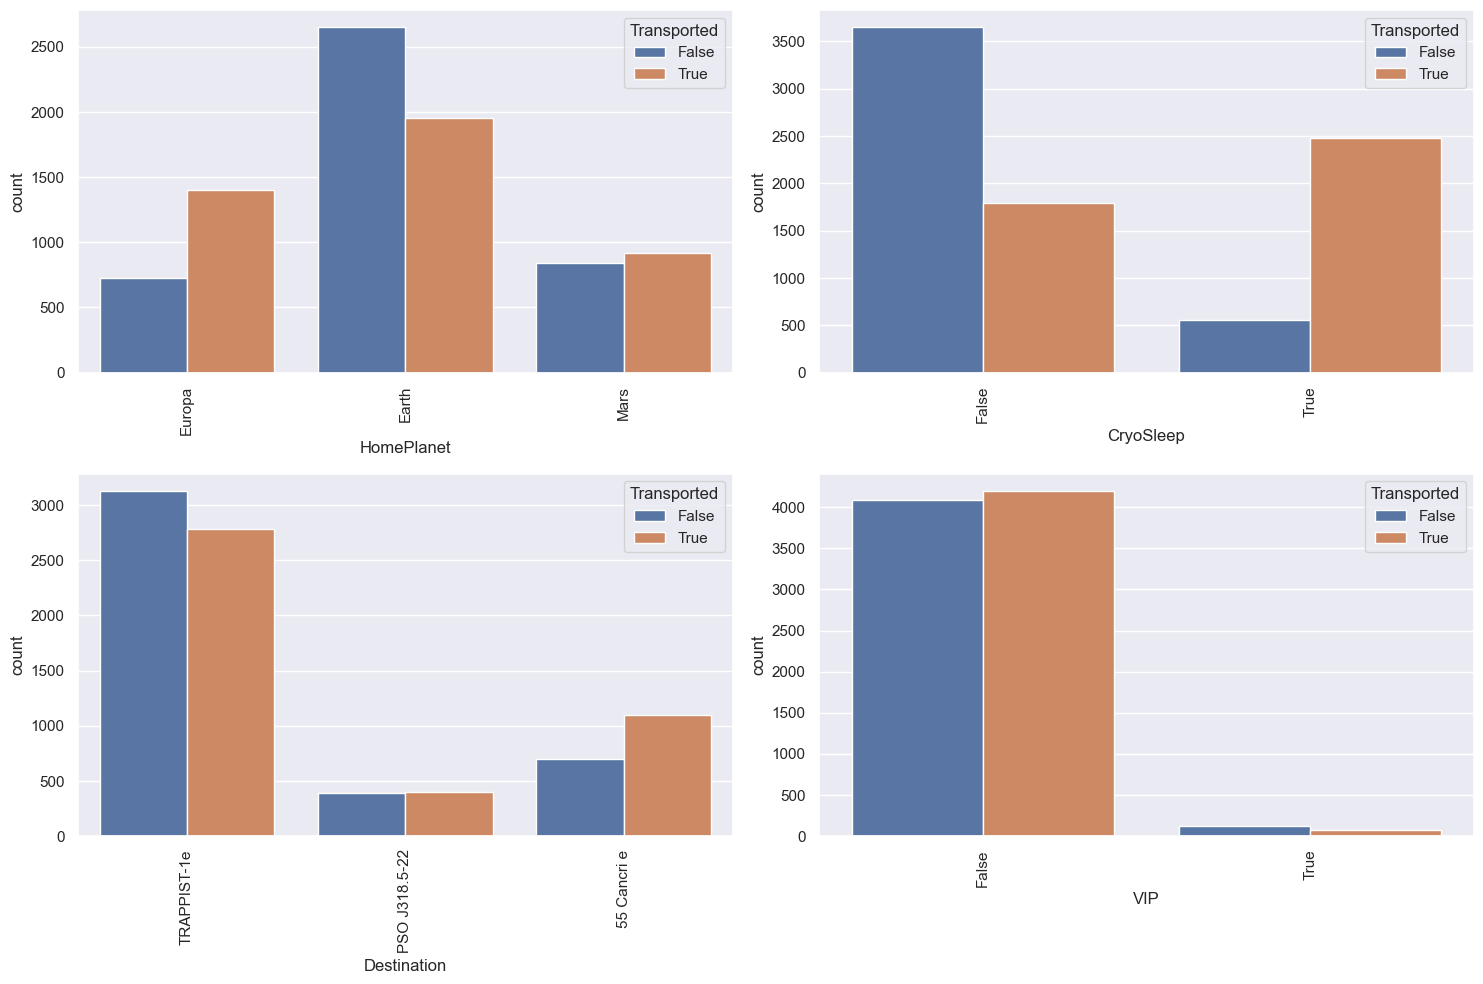

In [251]:
# Categorical variables to plot list
cat_vars = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Subplot figures
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axs = axs.flatten()

# Creating barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Transported', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Adjusting space between subplots
fig.tight_layout()

plt.show()

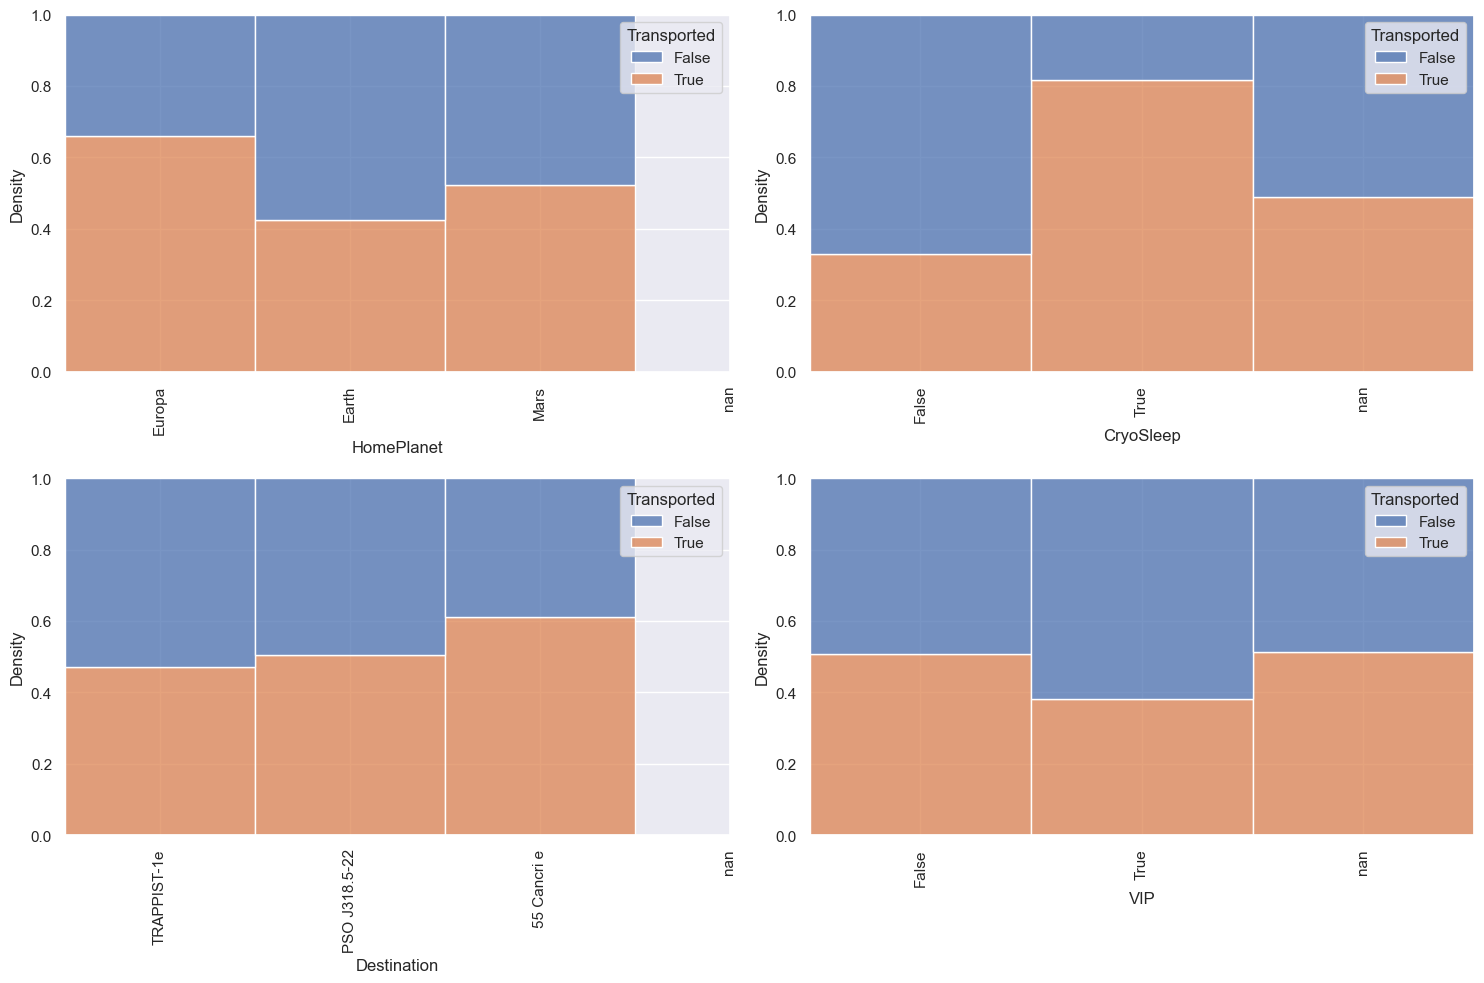

In [252]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# Converting boolean values to strings ('Transported' column)
df['CryoSleep'] = df['CryoSleep'].astype(str)
df['VIP'] = df['VIP'].astype(str)

# Categorical variables
cat_vars = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Subplot figures
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axs = axs.flatten()

# Each categorical variable plot
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='Transported', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    xticks = range(len(df[var].unique()))
    axs[i].set_xticks(xticks)
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

fig.tight_layout()
plt.show()

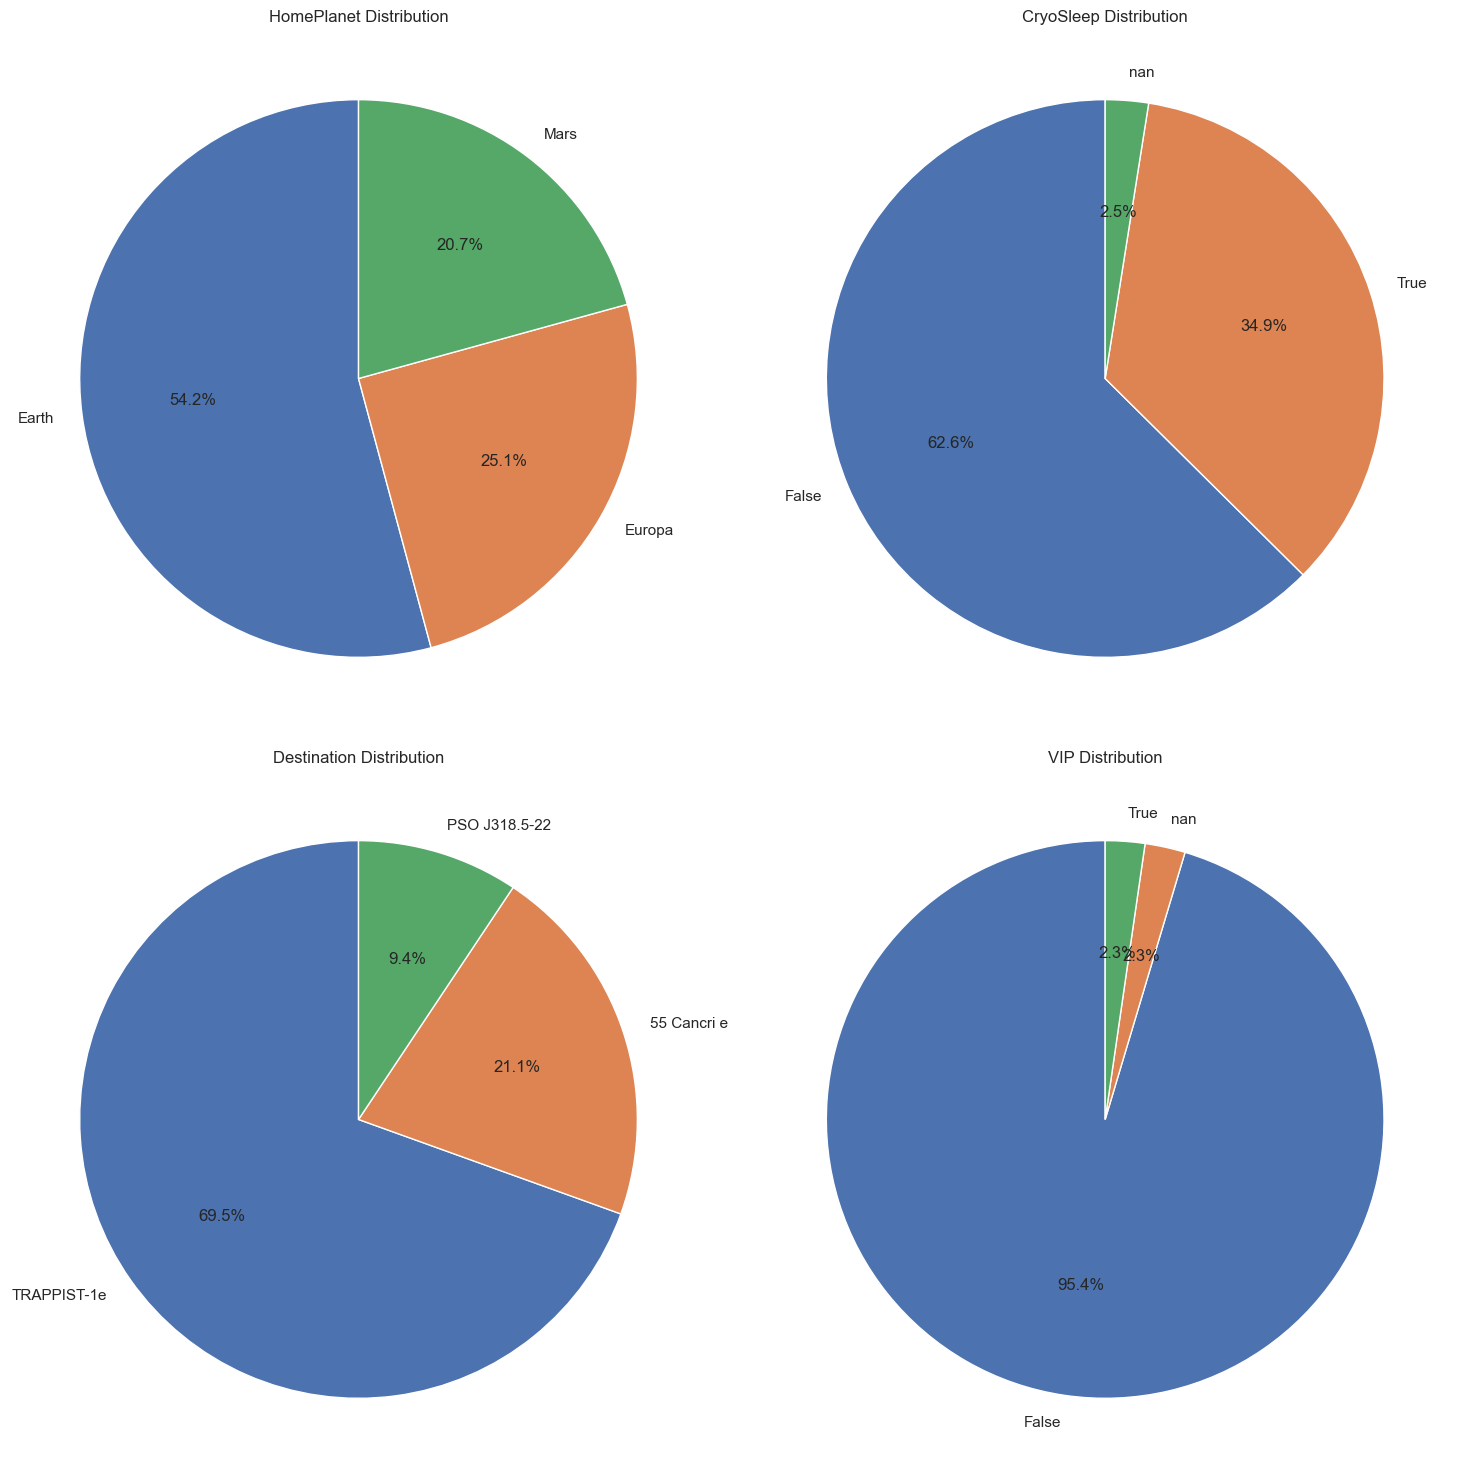

In [253]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

# Categorical variable Pie charts
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # Each category frequency
        cat_counts = df[var].value_counts()

        # Pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # Title
        axs.flat[i].set_title(f'{var} Distribution')


fig.tight_layout()
plt.show()

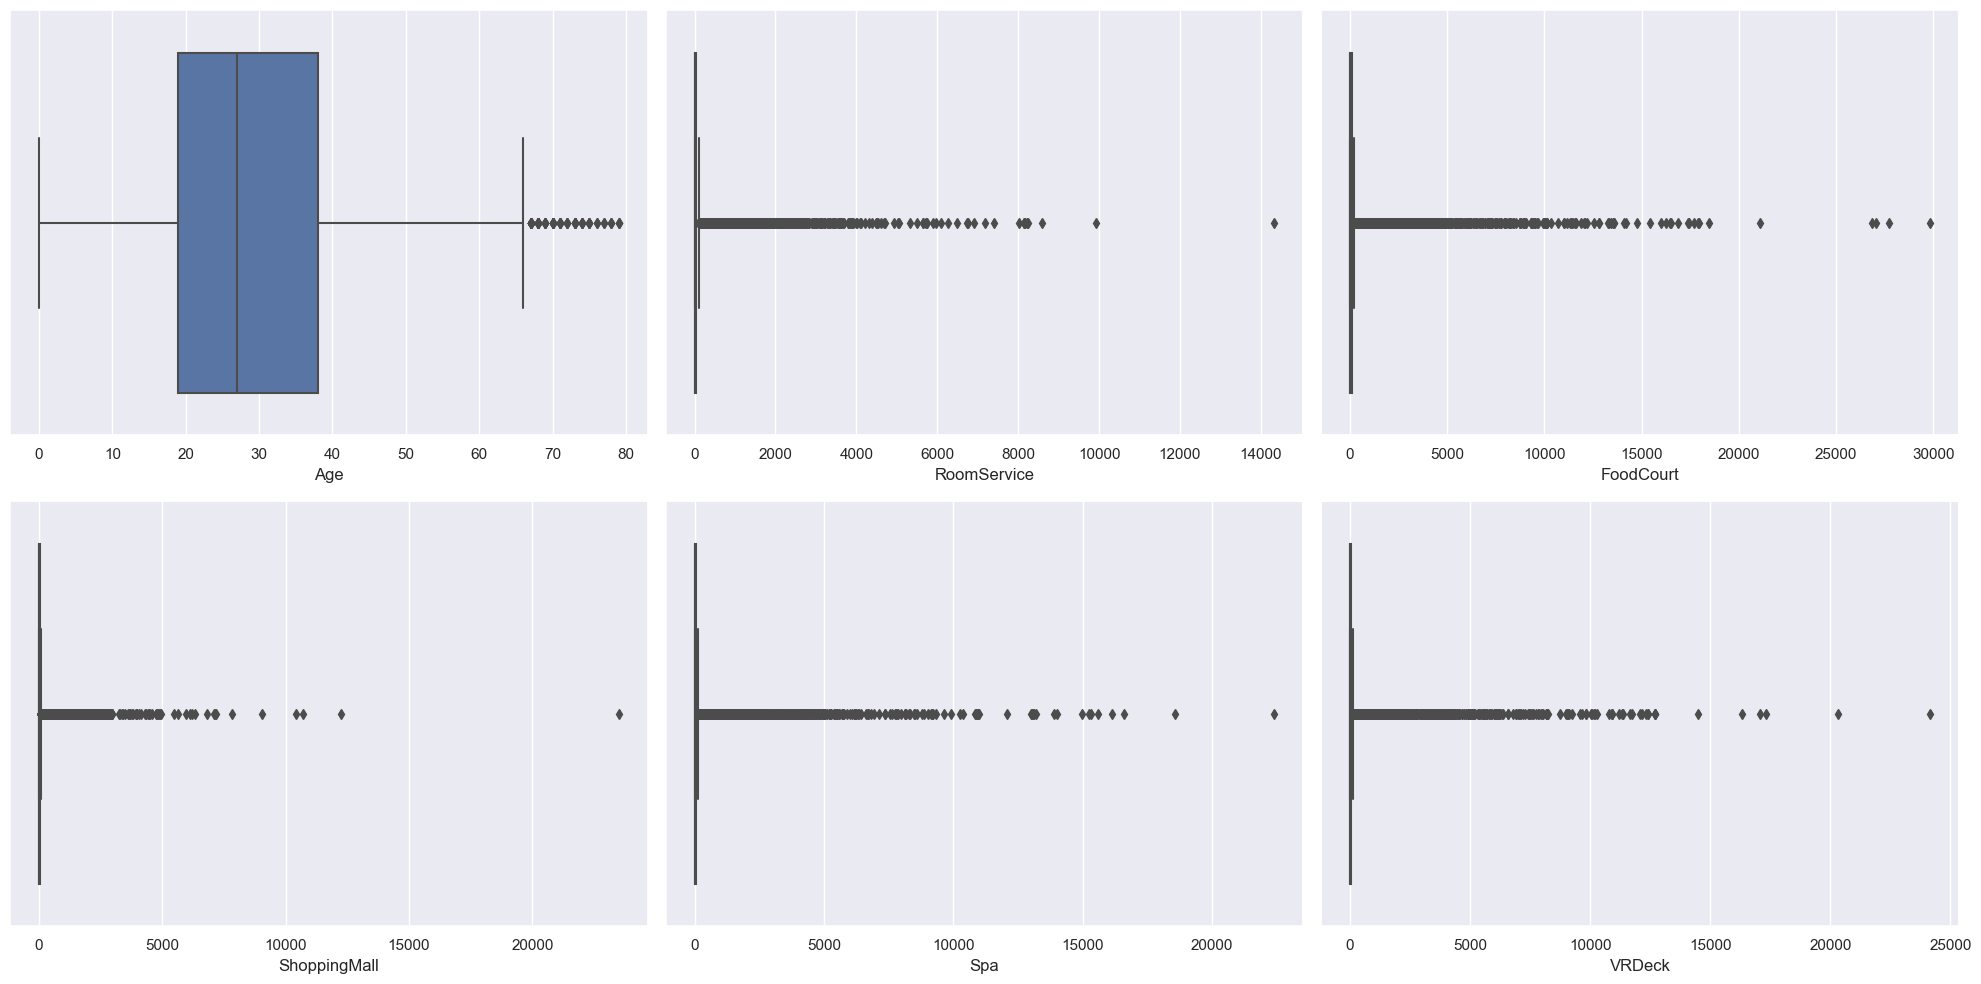

In [254]:
num_vars = ['Age', 'RoomService', 'FoodCourt',
            'ShoppingMall','Spa','VRDeck']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()
plt.show()

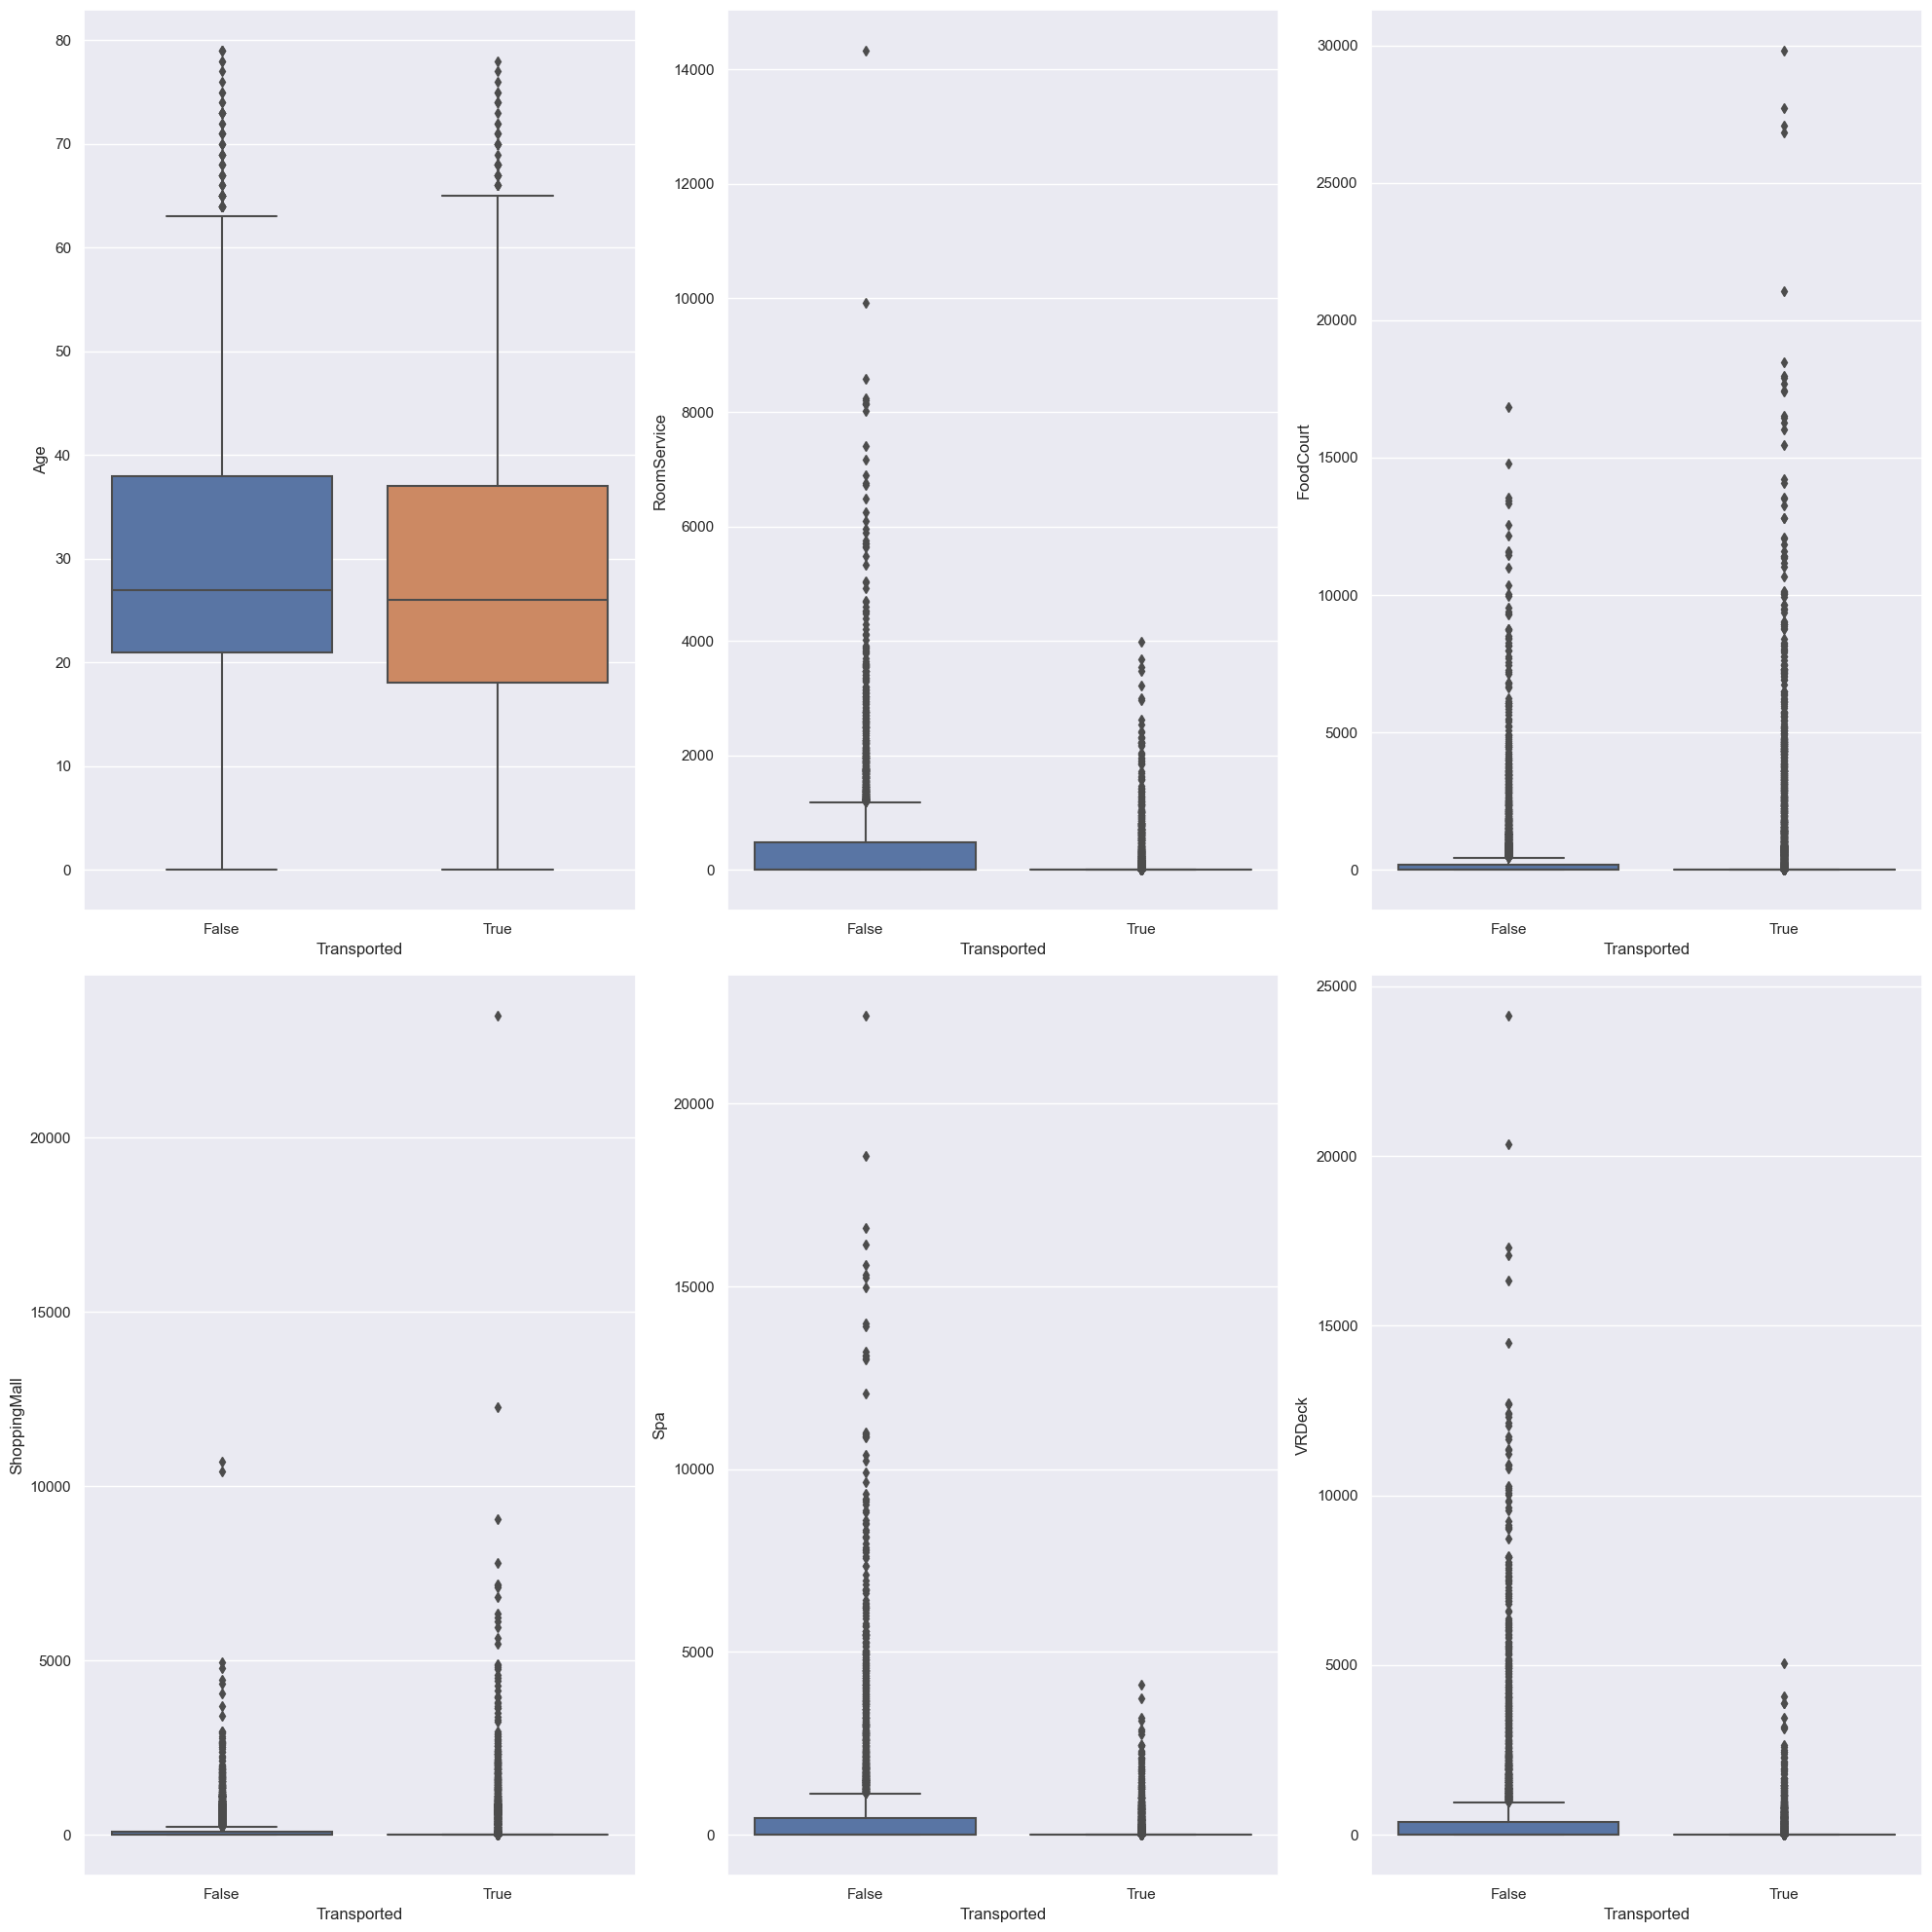

In [255]:
num_vars = ['Age', 'RoomService', 'FoodCourt',
            'ShoppingMall','Spa','VRDeck']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(y=var, x='Transported', data=df, ax=axs[i])

fig.tight_layout()
plt.show()

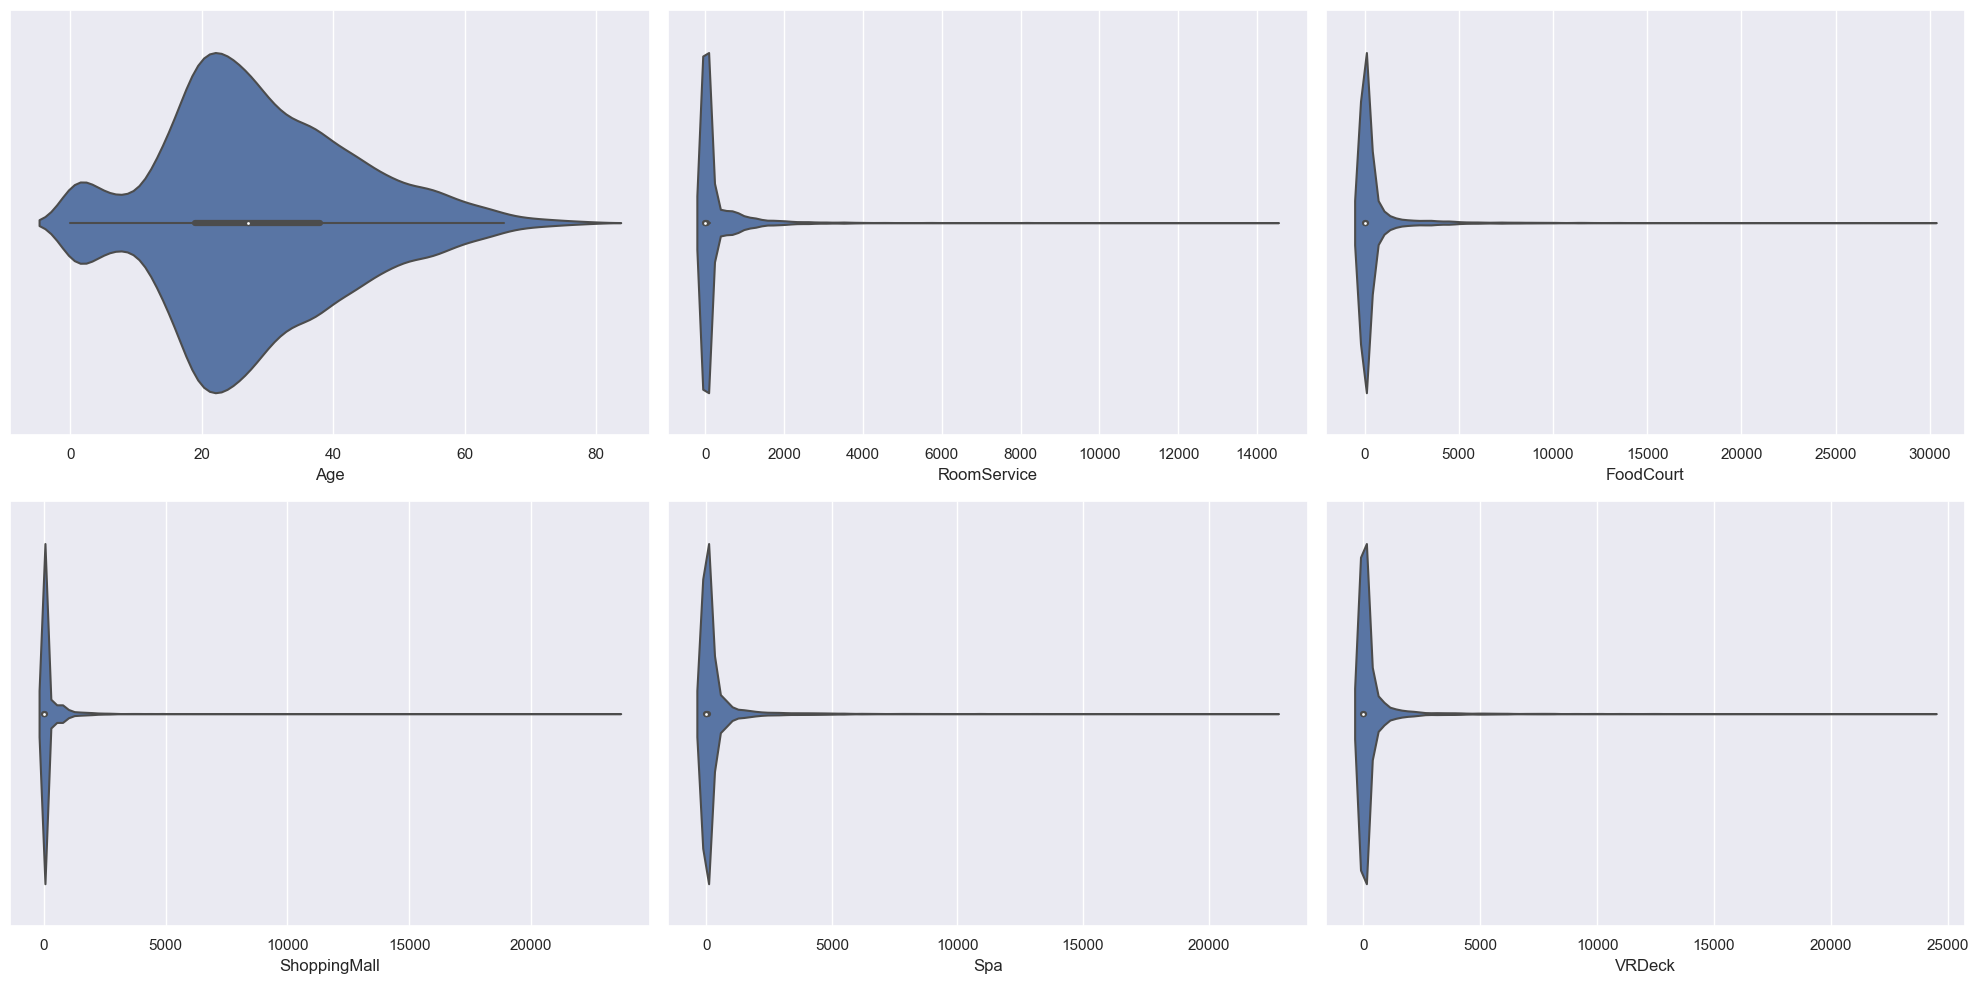

In [256]:
num_vars = ['Age', 'RoomService', 'FoodCourt',
            'ShoppingMall','Spa','VRDeck']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()
plt.show()

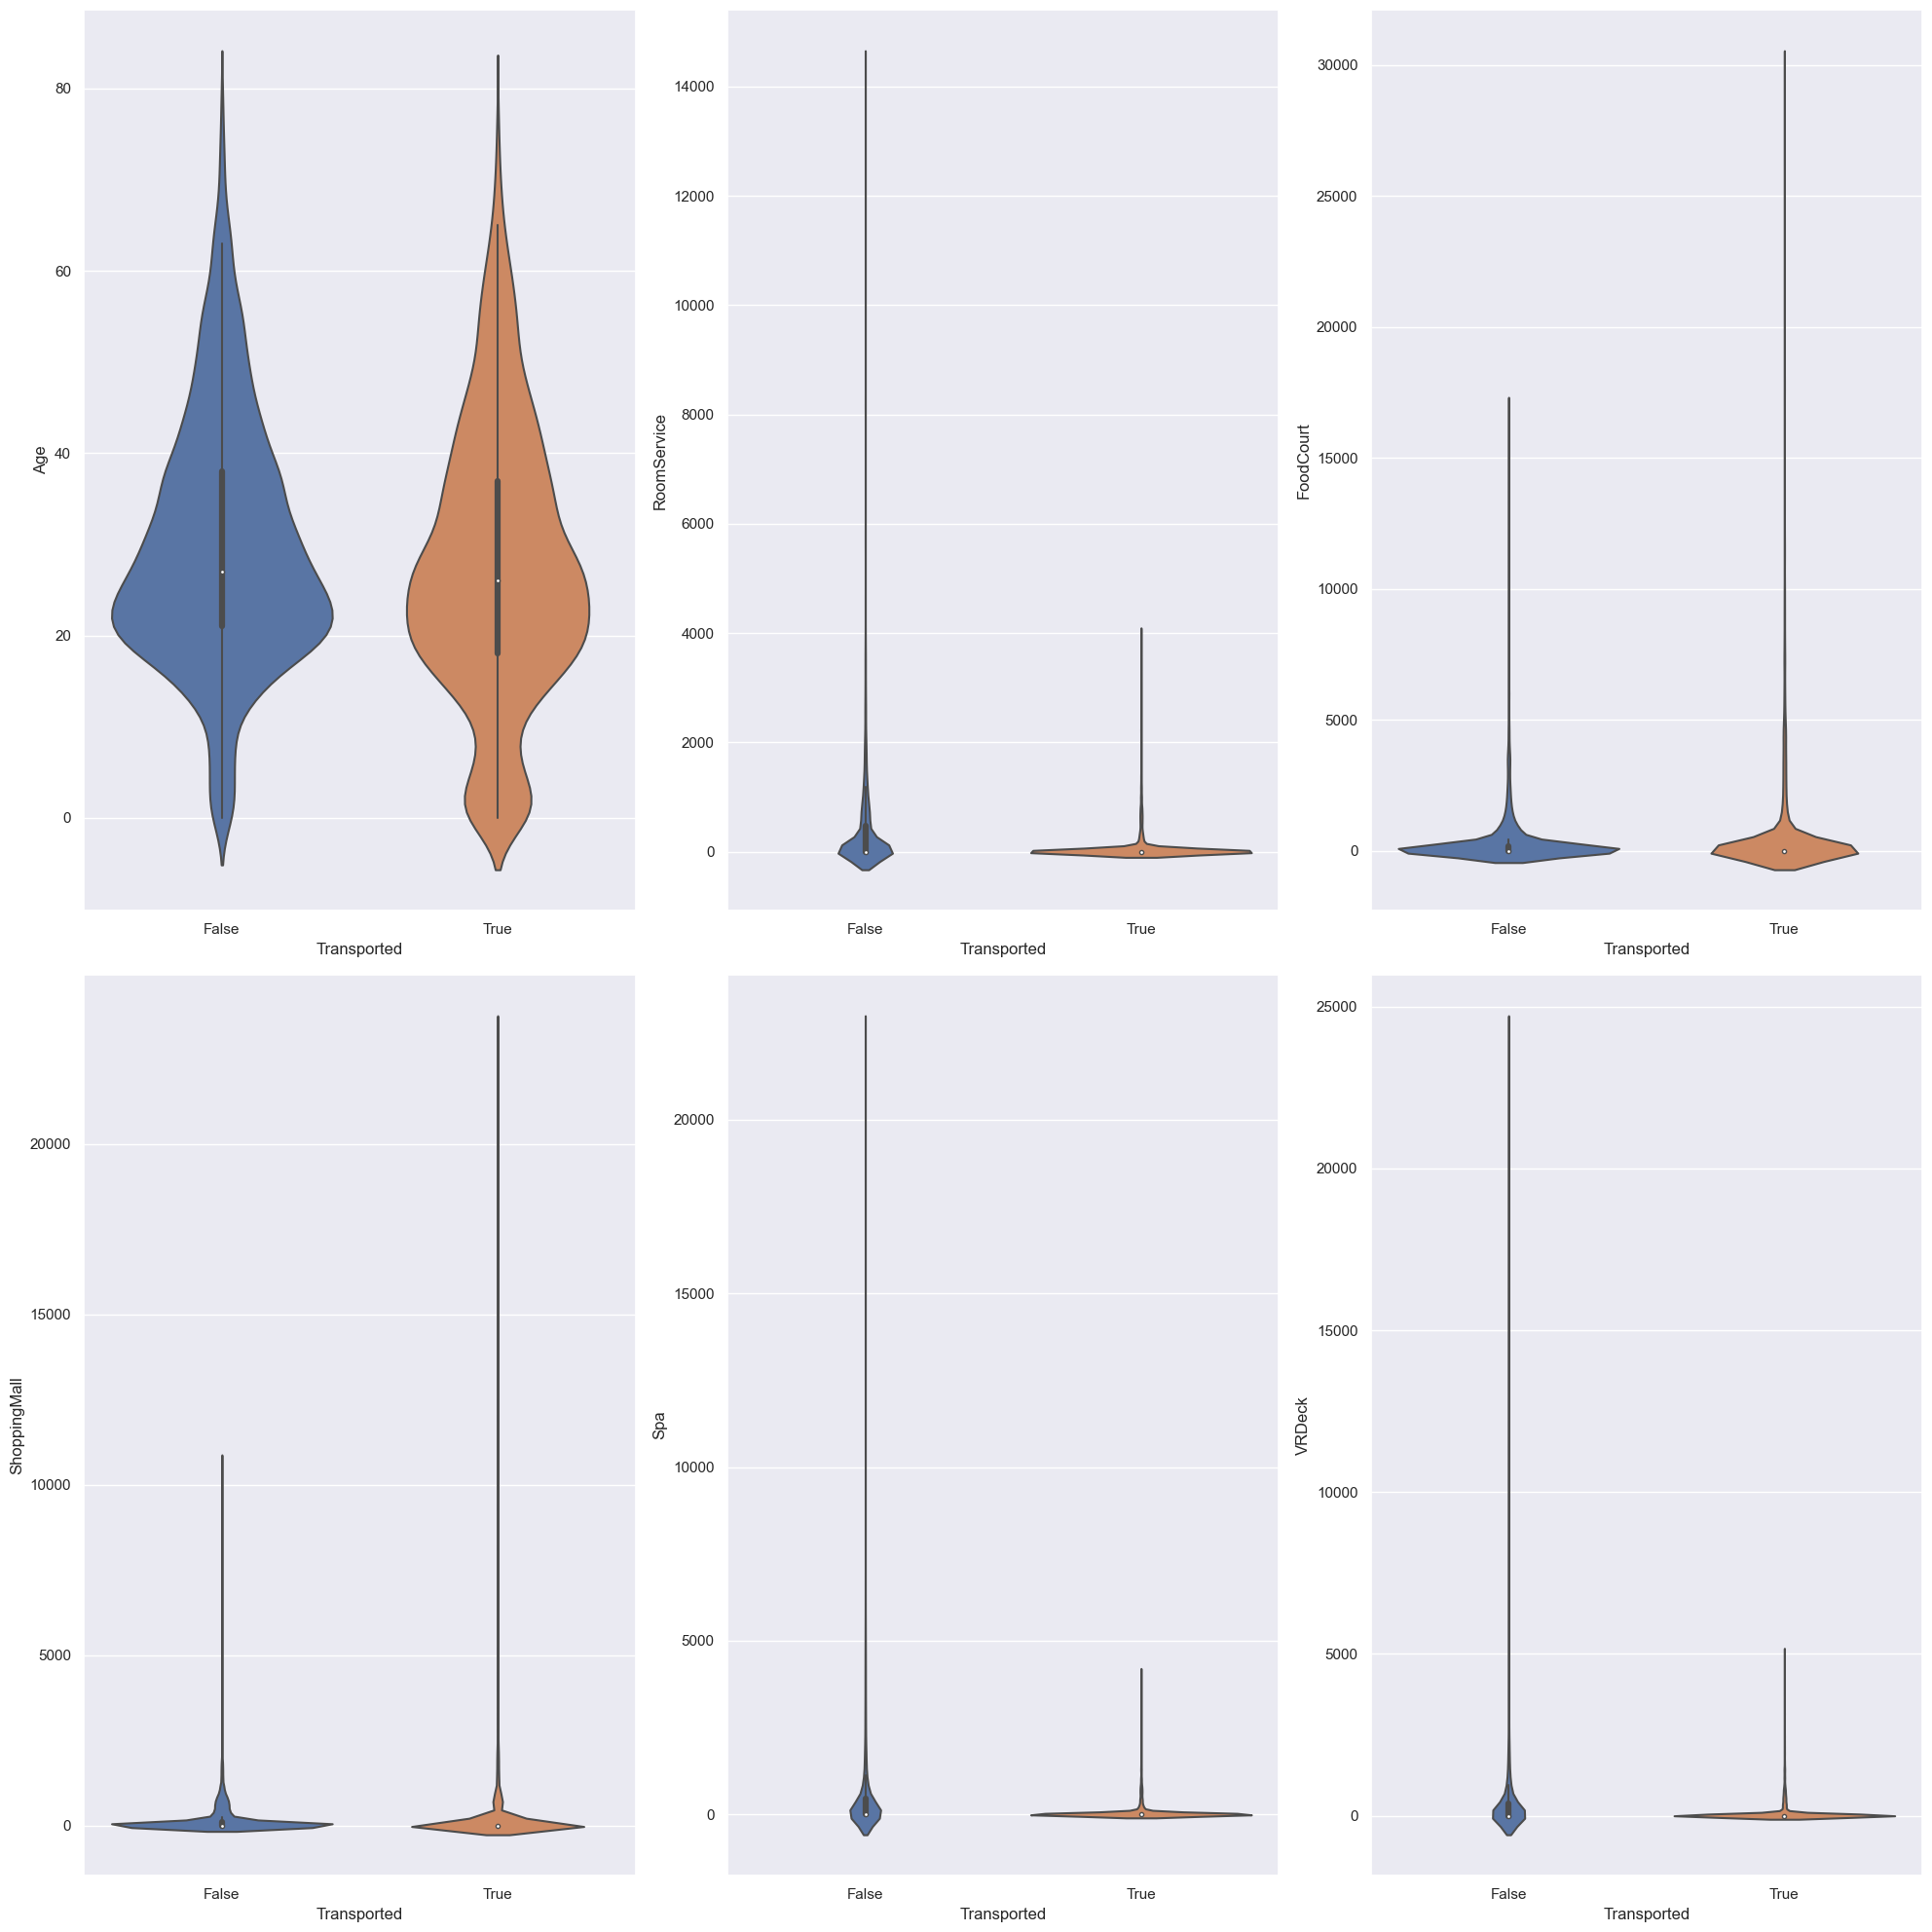

In [257]:
num_vars = ['Age', 'RoomService', 'FoodCourt',
            'ShoppingMall','Spa','VRDeck']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(y=var, data=df, x='Transported', ax=axs[i])

fig.tight_layout()
plt.show()

In [258]:
# Null/ Missing values check
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

ShoppingMall    2.392730
HomePlanet      2.312205
VRDeck          2.162660
FoodCourt       2.105142
Spa             2.105142
Destination     2.093639
RoomService     2.082135
Age             2.059128
dtype: float64

In [259]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [260]:
df.info

<bound method DataFrame.info of      HomePlanet CryoSleep    Destination   Age    VIP  RoomService  FoodCourt  \
0        Europa     False    TRAPPIST-1e  39.0  False          0.0        0.0   
1         Earth     False    TRAPPIST-1e  24.0  False        109.0        9.0   
2        Europa     False    TRAPPIST-1e  58.0   True         43.0     3576.0   
3        Europa     False    TRAPPIST-1e  33.0  False          0.0     1283.0   
4         Earth     False    TRAPPIST-1e  16.0  False        303.0       70.0   
...         ...       ...            ...   ...    ...          ...        ...   
8688     Europa     False    55 Cancri e  41.0   True          0.0     6819.0   
8689      Earth      True  PSO J318.5-22  18.0  False          0.0        0.0   
8690      Earth     False    TRAPPIST-1e  26.0  False          0.0        0.0   
8691     Europa     False    55 Cancri e  32.0  False          0.0     1049.0   
8692     Europa     False    TRAPPIST-1e  44.0  False        126.0     4688.0

In [261]:
df.shape

(8693, 11)

In [262]:
# Removing Null values as only 2% of data is missing
df.dropna(inplace=True)
df.shape

(7281, 11)

# Object Type - Label Encoding

In [263]:
# Looping each column in the DataFrame where data type is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Printing column name with unique values
    print(f"{col}: {df[col].unique()}")

HomePlanet: ['Europa' 'Earth' 'Mars']
CryoSleep: ['False' 'True' 'nan']
Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
VIP: ['False' 'True' 'nan']


In [264]:
df['CryoSleep'] = df['CryoSleep'].replace('nan', np.nan)
df['VIP'] = df['VIP'].replace('nan', np.nan)
df.dropna(inplace=True)
df.shape

(6923, 11)

In [265]:
# Looping each column in the DataFrame where data type is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Printing column name with unique values
    print(f"{col}: {df[col].unique()}")

HomePlanet: ['Europa' 'Earth' 'Mars']
CryoSleep: ['False' 'True']
Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
VIP: ['False' 'True']


In [266]:
from sklearn import preprocessing

# Looping each column in the DataFrame where data type is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Printing the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

HomePlanet: [1 0 2]
CryoSleep: [0 1]
Destination: [2 1 0]
VIP: [0 1]


# Heatmap - Correlation

<Axes: >

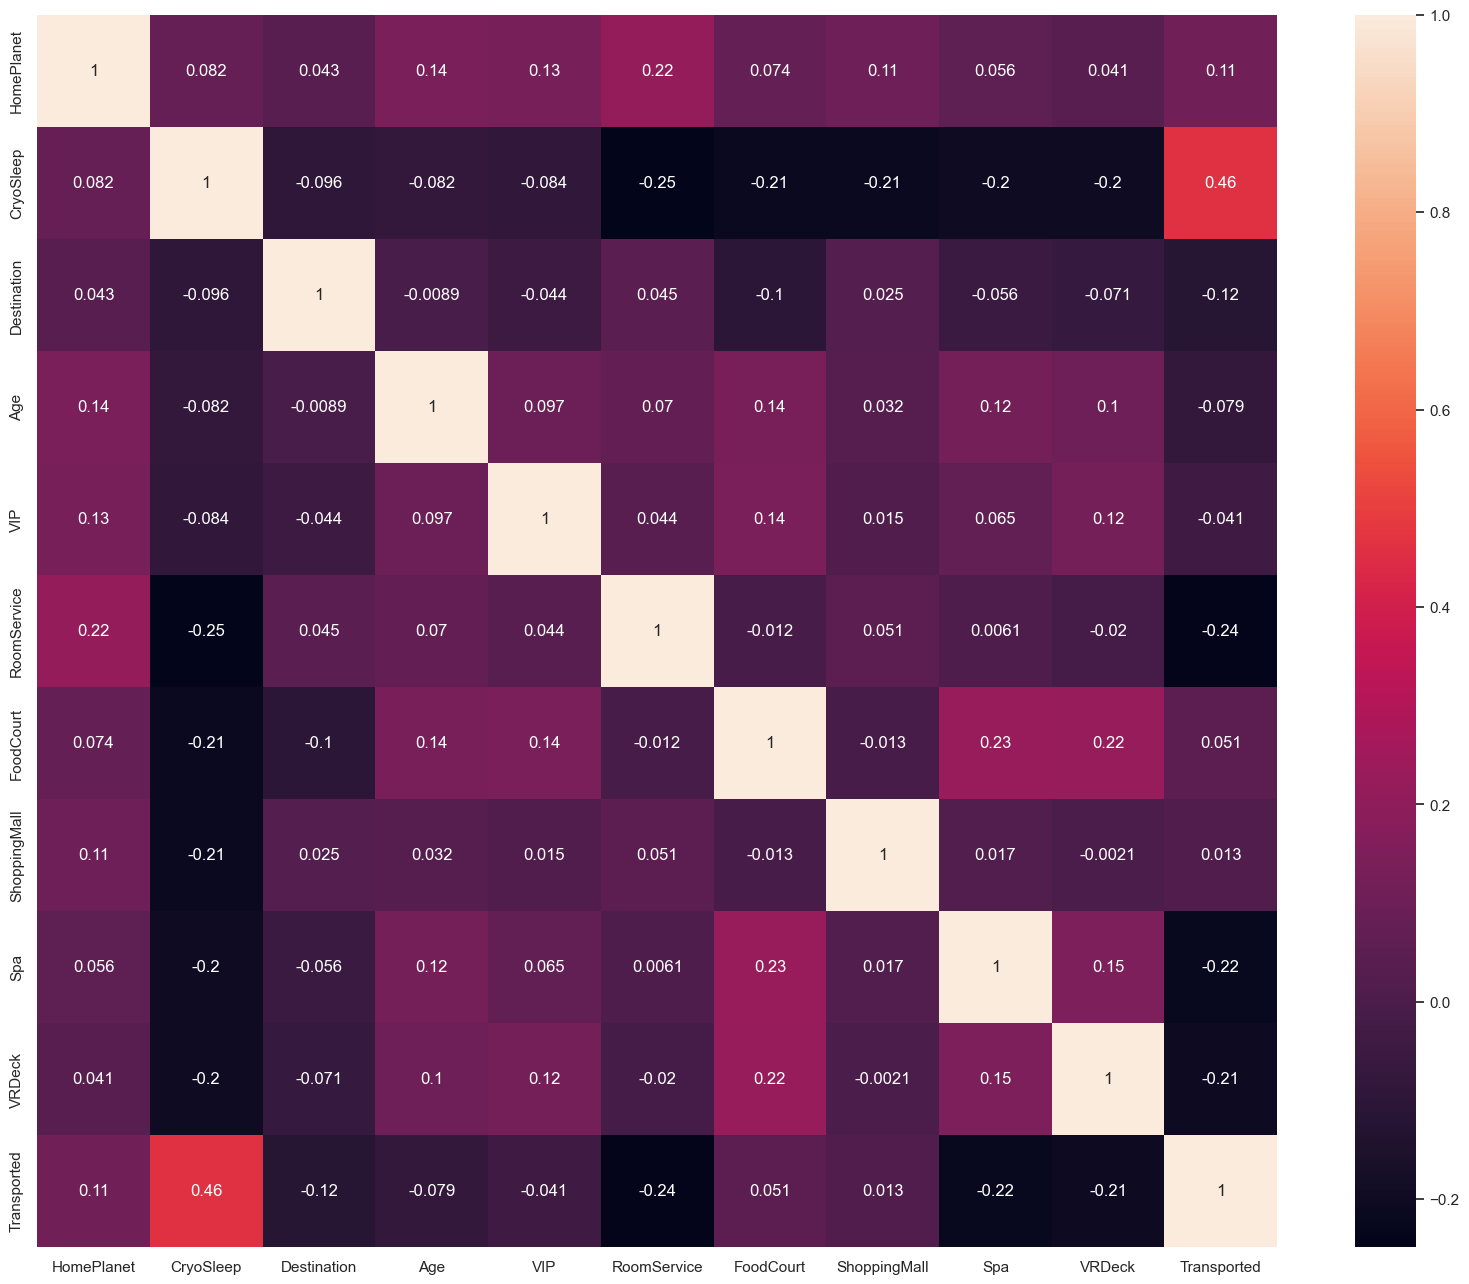

In [267]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

# Splitting Training and Testing datasets

In [268]:
from sklearn.model_selection import train_test_split
# Selecting the features as (X) and the target variable as (y)
X = df.drop('Transported', axis=1)
y = df['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# IQR applied outlier removal

In [269]:
from scipy import stats

selected_columns = ['Age', 'RoomService', 'FoodCourt',
                    'ShoppingMall','Spa','VRDeck']

# Calculate the IQR
Q1 = X_train[selected_columns].quantile(0.25)
Q3 = X_train[selected_columns].quantile(0.75)
IQR = Q3 - Q1

# Setting a threshold value for outliers (example, 1.5 times the IQR)
threshold = 1.5

# Find the indices of outliers based on the threshold
outlier_indices = ((X_train[selected_columns] < (Q1 - threshold * IQR)) |
                   (X_train[selected_columns] > (Q3 + threshold * IQR))).any(axis=1)

# Removing outliers
X_train = X_train[~outlier_indices]
y_train = y_train[~outlier_indices]

# Decision Tree

In [270]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Conducting a grid search using cross-validation to identify the optimal hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 0}


In [271]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_leaf=3, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=3,
                       random_state=0)

In [272]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score:", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score: 68.95 %


In [273]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score: ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score: ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score: ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score: ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss: ',(log_loss(y_test, y_pred)))

F-1 Score:  0.6895306859205776
Precision Score:  0.6895306859205776
Recall Score:  0.6895306859205776
Jaccard Score:  0.5261707988980716
Log Loss:  11.19044834463565


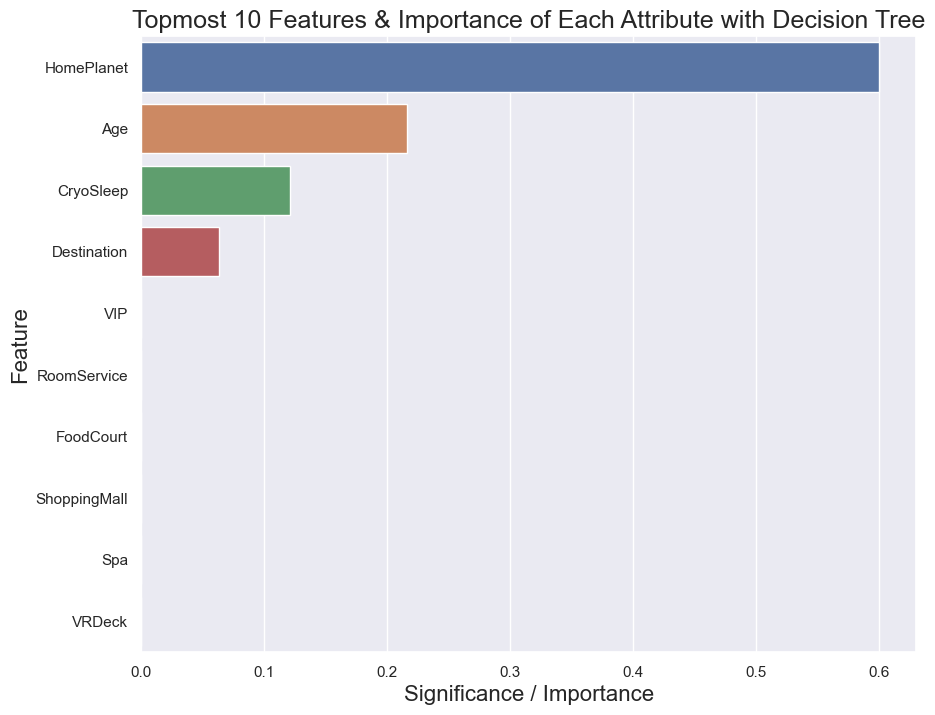

In [274]:
imp_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Significance / Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Significance / Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Significance / Importance', y='Feature')
plt.title('Topmost 10 Features & Importance of Each Attribute with Decision Tree', fontsize=18)
plt.xlabel ('Significance / Importance', fontsize=16)
plt.ylabel ('Feature', fontsize=16)
plt.show()

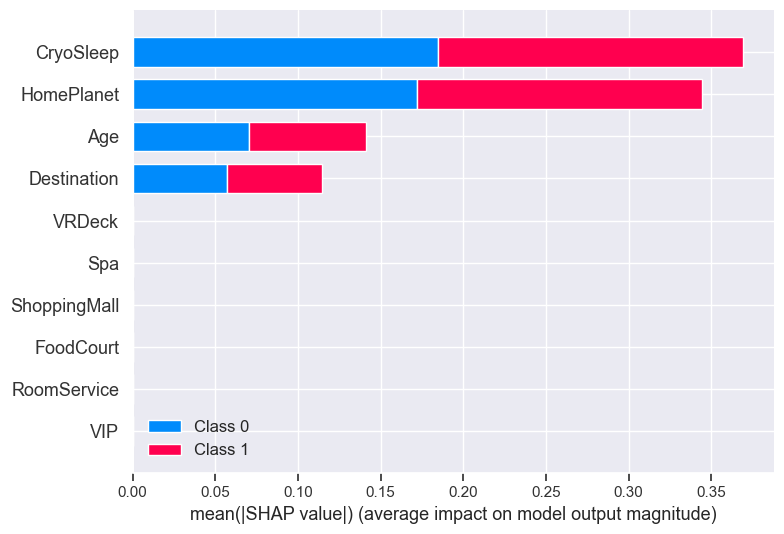

In [275]:
# We need shap libarary to plot the shap values, for interpreting and explaining ML models.
#pip install shap
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

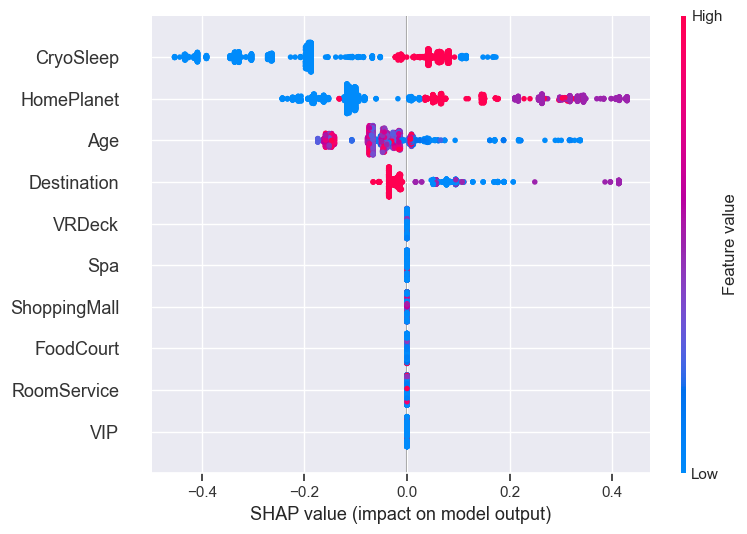

In [276]:
# SHAP values computation
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

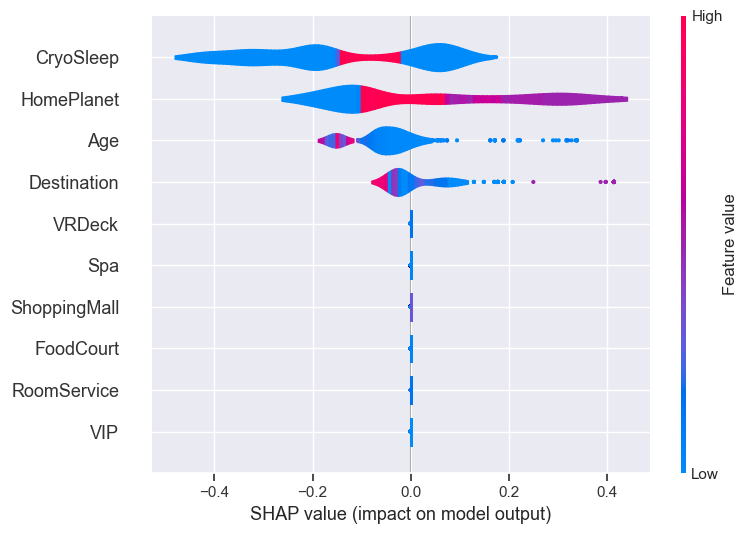

In [277]:
# SHAP values computation
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns, plot_type="violin")

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.6895306859205776')

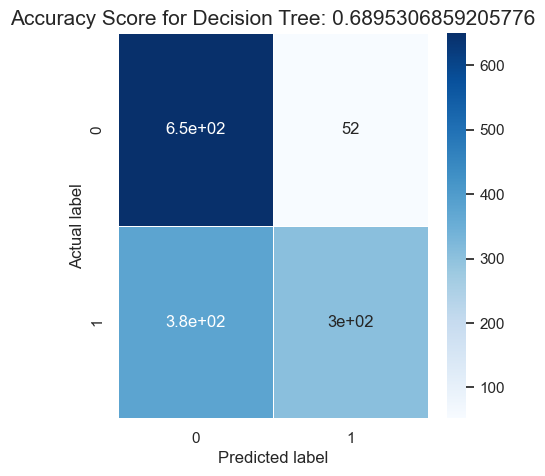

In [278]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

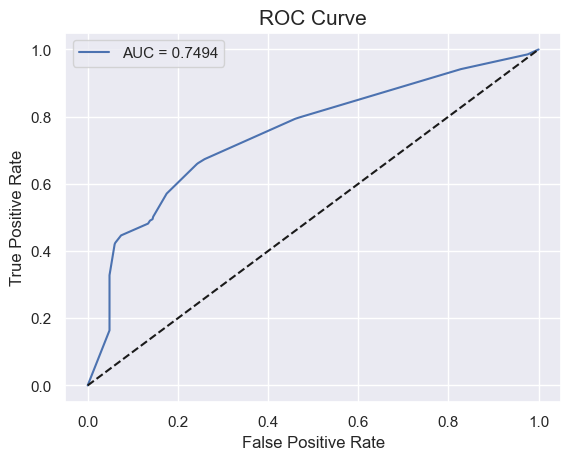

In [279]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# Trying out Random Forest Classifier

In [280]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Conducting a grid search using cross-validation to identify the optimal hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': None, 'max_features': None, 'n_estimators': 100, 'random_state': 42}


In [281]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, max_features= None, n_estimators=100, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features=None,
                       random_state=42)

In [282]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 64.55 %


In [283]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score: ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score: ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score: ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score: ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss: ',(log_loss(y_test, y_pred)))

F-1 Score:  0.6454873646209386
Precision Score:  0.6454873646209386
Recall Score:  0.6454873646209386
Jaccard Score:  0.47654584221748403
Log Loss:  12.77793055166536


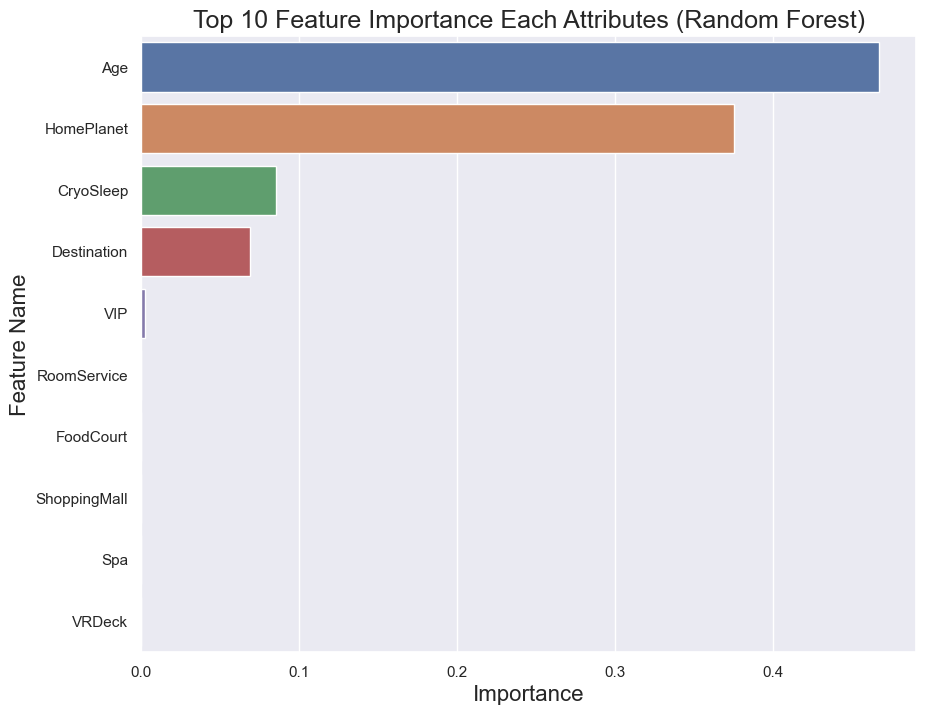

In [284]:
new_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = new_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

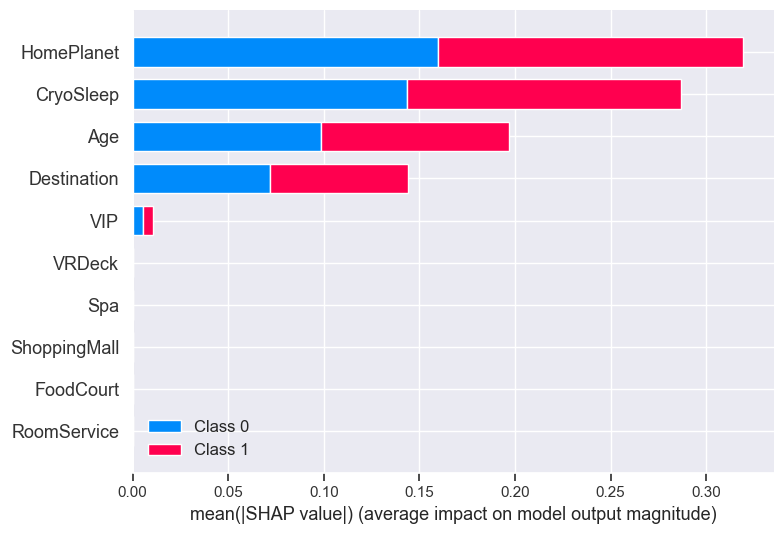

In [285]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

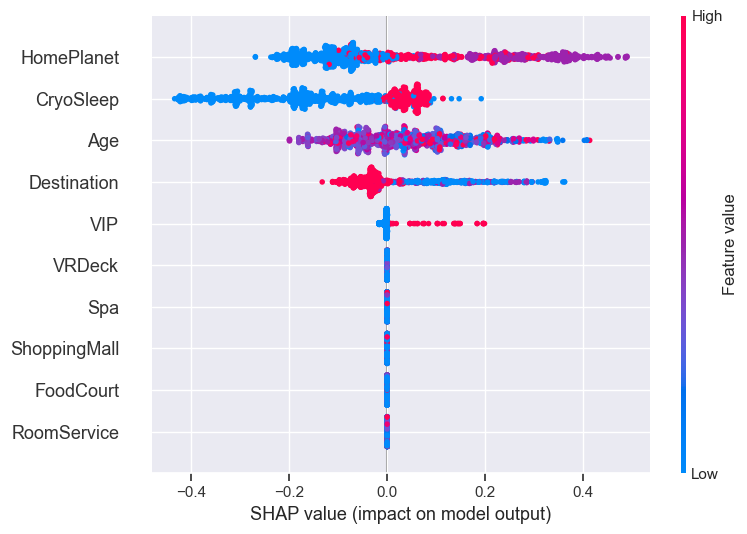

In [286]:
# SHAP values computation
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

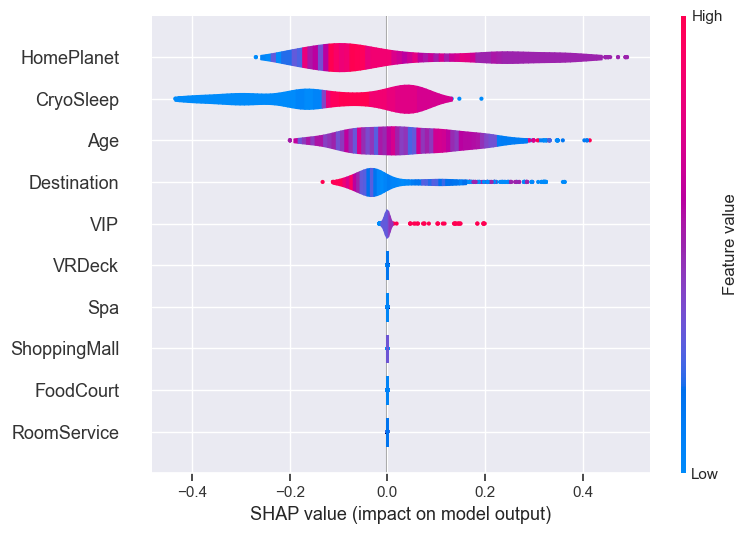

In [287]:
# SHAP values computation
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns, plot_type="violin")

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.6454873646209386')

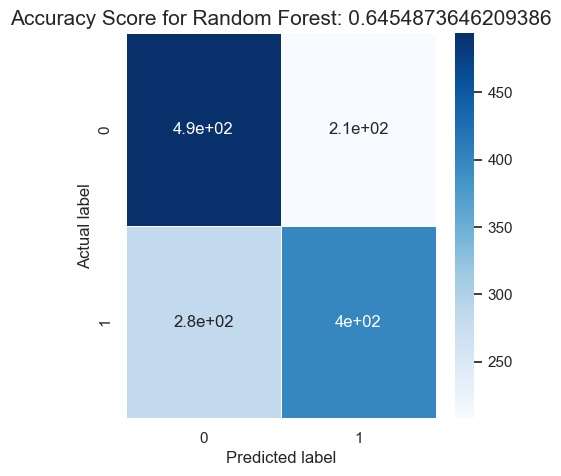

In [288]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

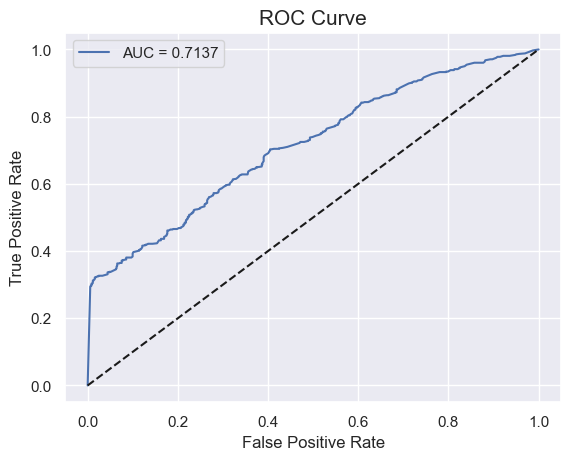

In [289]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()